<a href="https://colab.research.google.com/github/saurabhgupta18891/Documents-Text--Classification-and-Clustering/blob/master/Text_Classification_Distillbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
!pip install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import pandas as pd
import numpy as np
np.random.seed(1337)
from keras import Sequential
from keras.utils import Sequence
from keras.layers import LSTM, Dense, Masking
import numpy as np
import keras
from keras.utils import np_utils
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Embedding, Dense, Input, concatenate, Layer, Lambda, Dropout, Activation
import datetime
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, TensorBoard
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import losses

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTEN

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Loading The Data

In [ ]:
#train_raw = pd.read_csv(r'C:\Users\Saurabh\OneDrive - R Systems International Ltd\Desktop\Text-Classification\rows.csv\consumer_complaints.csv')
# # train_raw.head()
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_raw=pd.read_csv('gdrive/My Drive/consumer_complaints.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,6,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train_raw.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


# Preprocessing Data

Select non null:

In [ ]:
train_raw = train_raw[train_raw["Consumer complaint narrative"].notnull()]
train_raw.shape

(383564, 18)

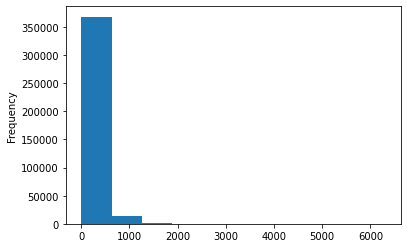

In [ ]:
train_raw["Consumer complaint narrative"].apply(lambda x: len(x.split())).plot(kind='hist')

In [ ]:
train_raw['len_txt'] =train_raw["Consumer complaint narrative"].apply(lambda x: len(x.split()))
train_raw.describe()

,Complaint ID,len_txt
count,3.835640e+05,383564.000000
mean,2.440054e+06,196.822382
std,5.316289e+05,211.063970
min,1.290155e+06,1.000000
25%,2.027031e+06,71.000000
50%,2.580564e+06,136.000000
75%,2.881326e+06,249.000000
max,3.189109e+06,6314.000000


In [ ]:
train_raw.shape

(383564, 19)

Select only the row with number of words greater than 250:

In [ ]:
train_raw = train_raw[train_raw.len_txt >249]
train_raw.shape

(95534, 19)

In [ ]:
train_raw = train_raw[["Consumer complaint narrative", 'Product']]
train_raw.reset_index(inplace=True, drop=True)
train_raw.head()

,Consumer complaint narrative,Product
0,The reason for my writing is to inform you tha...,"Credit reporting, credit repair services, or o..."
1,YOUR COMPLAINT I am disputing the debt owed to...,Debt collection
2,There's alot of inaccurate information constan...,"Credit reporting, credit repair services, or o..."
3,XX/XX/XXXX - called Rushmore Loan Management S...,Debt collection
4,I contacted transunion and XXXX about an acco...,"Credit reporting, credit repair services, or o..."


In [ ]:
train_raw["Product"].value_counts()

Mortgage                                                                        22713
Debt collection                                                                 15530
Credit reporting, credit repair services, or other personal consumer reports    14767
Student loan                                                                     7125
Credit card or prepaid card                                                      7059
Credit card                                                                      5525
Bank account or service                                                          5046
Checking or savings account                                                      4573
Credit reporting                                                                 4403
Consumer Loan                                                                    2802
Vehicle loan or lease                                                            2091
Money transfer, virtual currency, or money service    

Group similar products

In [ ]:
train_raw.loc[train_raw['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
train_raw.loc[train_raw['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
train_raw.loc[train_raw['Product'] == 'Prepaid card', 'Product'] = 'Credit card or prepaid card'
train_raw.loc[train_raw['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
train_raw.loc[train_raw['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'


In [ ]:
train_raw.head()

,Consumer complaint narrative,Product
0,The reason for my writing is to inform you tha...,"Credit reporting, credit repair services, or o..."
1,YOUR COMPLAINT I am disputing the debt owed to...,Debt collection
2,There's alot of inaccurate information constan...,"Credit reporting, credit repair services, or o..."
3,XX/XX/XXXX - called Rushmore Loan Management S...,Debt collection
4,I contacted transunion and XXXX about an acco...,"Credit reporting, credit repair services, or o..."


In [ ]:
for l in np.unique(train_raw['Product']):
    print(l)

Bank account or service
Checking or savings account
Consumer Loan
Credit card or prepaid card
Credit reporting, credit repair services, or other personal consumer reports
Debt collection
Money transfer, virtual currency, or money service
Money transfers
Mortgage
Other financial service
Payday loan, title loan, or personal loan
Student loan
Vehicle loan or lease


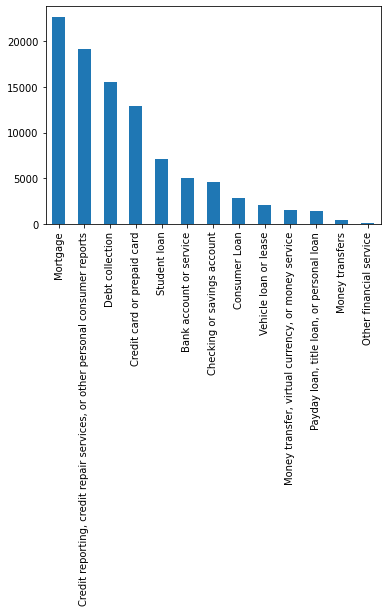

In [ ]:
train_raw['Product'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
train_raw=train_raw.rename(columns = {'Consumer complaint narrative':'text', 'Product':'label'})
train_raw.head()

,text,label
0,The reason for my writing is to inform you tha...,"Credit reporting, credit repair services, or o..."
1,YOUR COMPLAINT I am disputing the debt owed to...,Debt collection
2,There's alot of inaccurate information constan...,"Credit reporting, credit repair services, or o..."
3,XX/XX/XXXX - called Rushmore Loan Management S...,Debt collection
4,I contacted transunion and XXXX about an acco...,"Credit reporting, credit repair services, or o..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train_raw['label'] = LE.fit_transform(train_raw['label'])
train_raw.head()

,text,label
0,The reason for my writing is to inform you tha...,4
1,YOUR COMPLAINT I am disputing the debt owed to...,5
2,There's alot of inaccurate information constan...,4
3,XX/XX/XXXX - called Rushmore Loan Management S...,5
4,I contacted transunion and XXXX about an acco...,4


In [ ]:
len(np.unique(train_raw['label']))

13

In [ ]:
train = train_raw.copy()

In [ ]:
train = train.reindex(np.random.permutation(train.index))
train.head()

,text,label
50821,I applied for the XXXX XXXX XXXX card after re...,3
80946,I hereby file a complaint against XXXX XXXX XX...,8
78683,I have a civil action that 's incorrect been r...,4
82898,"To whom may I concern, hello my name is XXXX X...",8
1586,1. I received several phone calls from this nu...,5


Clean the text columns

In [ ]:
import re
def clean_txt(text):
    text = re.sub("'", "",text)
    text=re.sub("(\\W)+"," ",text)    
    return text

In [ ]:
train['text']  = train.text.apply(clean_txt)
train.head()

,text,label
50821,I applied for the XXXX XXXX XXXX card after re...,3
80946,I hereby file a complaint against XXXX XXXX XX...,8
78683,I have a civil action that s incorrect been re...,4
82898,To whom may I concern hello my name is XXXX XX...,8
1586,1 I received several phone calls from this num...,5


In [ ]:
train

,text,label
50821,I applied for the XXXX XXXX XXXX card after re...,3
80946,I hereby file a complaint against XXXX XXXX XX...,8
78683,I have a civil action that s incorrect been re...,4
82898,To whom may I concern hello my name is XXXX XX...,8
1586,1 I received several phone calls from this num...,5
...,...,...
87513,On vacation calling from our car I used our cr...,3
85159,I m unable to close bank accounts at Chase Ban...,0
9448,I have been receiving a hard credit inquiry fr...,4
57533,XX XX XXXX To whom it may concern In XX XX XXX...,3


In [ ]:
# from sklearn.model_selection import train_test_split
# train, val = train_test_split(train, test_size=0.2, random_state=35)
# train.head()

In [ ]:
train, validate, test = np.split(train.sample(frac=1, random_state=42), 
                       [int(.8*len(train)), int(.9*len(train))])

In [ ]:
test

,text,label
13483,To who it may be concerned This collection cha...,4
64083,I m writing to contest part of the charge from...,3
80770,Received an online payday loan from XXXX XXXX ...,10
28117,This all started when I attempted to transfer ...,1
11981,On XX XX XXXX I contacted XXXX XXXX XXXX to st...,8
...,...,...
38276,I began a divorce with my former spouse inXX X...,8
14869,On XX XX 18 we closed on our new home with XXX...,8
58216,In late XXXX I my mother moved into a rent w t...,5
32490,I received a XXXX credit card from XXXX XXXX a...,3


In [ ]:
train.reset_index(drop=True, inplace=True)
train.head(2)

,text,label
0,I am writing to to CFPB to alert CFPB on Exper...,4
1,I sold a home that closed XX XX XXXX The balan...,8


In [ ]:
validate.reset_index(drop=True, inplace=True)
validate.head(2)

,text,label
0,I applied for a Modification in XXXX XXXX and ...,8
1,My firm submitted authorization for this clien...,8


In [ ]:
test.reset_index(drop=True, inplace=True)
test.head(2)

,text,label
0,To who it may be concerned This collection cha...,4
1,I m writing to contest part of the charge from...,3


In [ ]:
test.shape,validate.shape, train.shape

((9554, 2), (9553, 2), (76427, 2))

In [ ]:
# def get_split(text1):
#     l_total = []
#     l_parcial = []
#     if len(text1.split())//150 >0:
#         n = len(text1.split())//150
#     else: 
#         n = 1
#     for w in range(n):
#         if w == 0:
#             l_parcial = text1.split()[:200]
#             l_total.append(" ".join(l_parcial))
#         else:
#             l_parcial = text1.split()[w*150:w*150 + 200]
#             l_total.append(" ".join(l_parcial))
#     return l_total
    ##Improvment

In [ ]:
from datasets import Dataset
import datasets

In [ ]:
train_dataset = Dataset.from_dict(train)
val_dataset = Dataset.from_dict(validate)
test_dataset= Dataset.from_dict(test)
my_dataset_dict = datasets.DatasetDict({"train":train_dataset,"val":val_dataset,"test":test_dataset})

In [ ]:
my_dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 76427
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 9553
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 9554
    })
})

In [ ]:
def label_int2str(x):
    return my_dataset_dict["train"].features["label"].int2str(x)

In [ ]:
my_dataset_dict["train"]["text"]

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
print(f"Vocab size is : {tokenizer.vocab_size}")
print(f"Model max length is : {tokenizer.model_max_length}")
print(f"Model input names are: {tokenizer.model_input_names}")

Vocab size is : 30522
Model max length is : 512
Model input names are: ['input_ids', 'attention_mask']


In [ ]:
# Tokenization function
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)
# Tokenize entire dataset 
tokenized_dataset = my_dataset_dict.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 76427
    })
    val: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 9553
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 9554
    })
})

In [ ]:
# oversample = SMOTE(tokenized_dataset["train"]["input_ids"],random_state=777,k_neighbors=5)
# X_smote,y_smote = oversample.fit_resample(X,tokenized_dataset["train"]["label"])
# # oversample = SMOTE()
# # X, y = oversample.fit_resample(X, y)

In [ ]:
train["label"].value_counts()

8     18315
4     15344
5     12355
3     10336
11     5677
0      4047
1      3628
2      2261
12     1628
6      1253
10     1153
7       355
9        75
Name: label, dtype: int64

In [ ]:
from transformers import TFAutoModelForSequenceClassification
num_labels = 13
model = TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, 
                                                             num_labels=num_labels)

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
batch_size=16
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
!pip install datasets

In [ ]:
#tf_dataset = model.prepare_tf_dataset(tokenized_dataset_train, batch_size=16, shuffle=True, tokenizer=tokenizer)

In [ ]:
tf_train_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=["input_ids","attention_mask"], 
    label_cols=["label"], 
    shuffle=True, 
    batch_size=batch_size,
    collate_fn=data_collator
)
tf_valid_dataset = tokenized_dataset["val"].to_tf_dataset(
    columns=["input_ids", "attention_mask"], 
    label_cols=["label"], 
    shuffle=False, 
    batch_size=batch_size,
    collate_fn=data_collator
)
tf_test_dataset = tokenized_dataset["test"].to_tf_dataset(
    columns=["input_ids", "attention_mask"], 
    label_cols=["label"], 
    shuffle=False, 
    batch_size=batch_size,
    collate_fn=data_collator
)

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
tf_train_dataset

<PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=metrics.SparseCategoricalAccuracy()
)

In [ ]:
model.fit(tf_train_dataset, 
          validation_data=tf_valid_dataset, 
          epochs=1)

   3/4777 [..............................] - ETA: 60:57:07 - loss: 2.5286 - sparse_categorical_accuracy: 0.1458

KeyboardInterrupt: ignored

In [ ]:
model.save("/content/gdrive/MyDrive/Colab Notebooks")

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
prediction = model.predict(tf_valid_dataset)

1195/1195 [==============================] - 359s 298ms/step


In [ ]:
prediction

TFSequenceClassifierOutput(loss=None, logits=array([[-0.0735933 , -2.845596  , -0.15404457, ..., -1.4408771 ,
        -2.2053566 , -1.9313825 ],
       [ 0.60461235, -1.0905535 , -1.2074717 , ..., -2.08407   ,
        -3.5241628 , -2.5083003 ],
       [ 1.7310587 ,  1.8166758 , -2.395232  , ..., -3.046733  ,
        -3.7889068 , -4.2347326 ],
       ...,
       [-2.769153  , -2.2740762 , -2.4138882 , ..., -2.2163196 ,
         5.340194  , -3.2542133 ],
       [ 0.00779356, -1.0115855 , -1.3719078 , ..., -2.2706687 ,
        -3.3396022 , -2.565132  ],
       [-2.8621073 , -3.690677  , -0.9577592 , ..., -0.71158195,
        -1.0822461 , -1.0180478 ]], dtype=float32), hidden_states=None, attentions=None)

In [ ]:
outputs = model.predict(tokenizer("I am sure i will do well in my exam.")["input_ids"])
outputs['logits'][0].tolist()

1/1 [==============================] - 2s 2s/step


[-0.7169638276100159,
 -0.0678609311580658,
 -1.2969688177108765,
 0.4881438612937927,
 0.04243877902626991,
 0.7089837789535522,
 -1.231553077697754,
 -2.7957847118377686,
 -0.46948179602622986,
 -1.7305536270141602,
 -1.2575603723526,
 1.2621546983718872,
 -1.0060926675796509]

In [ ]:
# from transformers import pipeline
# text="I am sure i will do well in my exam."
# classifier = pipeline("text-classification",model="distilbert-base-uncased")
# classifier(text)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classi

[{'label': 'LABEL_1', 'score': 0.5107253789901733}]

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(predictions, labels):
    #predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
compute_metrics(prediction)

ValueError: ignored

In [ ]:
import numpy as np
label_int = np.argmax(tf.keras.layers.Softmax()(outputs['logits'][0].tolist()))
print(label_int.item())

11


In [ ]:
print(label_int2str(label_int.item()))

AttributeError: ignored